In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Specify the path to the CSV file
diabetes_prediction_path = r"C:\Users\rjone\OneDrive\Desktop\Project_1\Data\diabetes_prediction_dataset.csv"

# Read the CSV file into a DataFrame
diabetes_prediction = pd.read_csv(diabetes_prediction_path)

# Display the first few rows of the DataFrame
diabetes_prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
diabetes_prediction_clean = diabetes_prediction.drop_duplicates()
diabetes_prediction_clean.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
mean_age = diabetes_prediction_clean["age"].mean()
mean_age

41.79432571297817

In [5]:
highest_bmi= diabetes_prediction_clean ["bmi"].max()
highest_bmi

95.69

In [6]:
lowest_bmi = diabetes_prediction_clean ["bmi"].min()
lowest_bmi

10.01

In [7]:
obese_with_betes = len(diabetes_prediction_clean[(diabetes_prediction_clean['bmi'] > 32) & (diabetes_prediction_clean['diabetes'] == 1)])
obese_with_betes



3419

In [45]:
obese =  len(diabetes_prediction_clean[diabetes_prediction_clean['bmi'] > 32])
obese

17285

In [9]:
rate_obese_with_betes = (obese_with_betes/obese)*100
rate_obese_with_betes

19.78015620480185

In [43]:
healthy_BMI = len(diabetes_prediction_clean[(diabetes_prediction_clean['bmi'] <= 25) & (diabetes_prediction_clean["bmi"] >= 18)])
healthy_BMI

23388

In [71]:
healthy_BMI_betes = len(diabetes_prediction_clean[(diabetes_prediction_clean['bmi'] <= 25) & (diabetes_prediction_clean["bmi"] >= 18) & (diabetes_prediction['diabetes'] == 1)])
healthy_BMI_betes

C:\Users\rjone\AppData\Local\Temp\ipykernel_16444\661278412.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  healthy_BMI_betes = len(diabetes_prediction_clean[(diabetes_prediction_clean['bmi'] <= 25) & (diabetes_prediction_clean["bmi"] >= 18) & (diabetes_prediction['diabetes'] == 1)])


877

In [42]:
rate_healthy_BMI_betes = (healthy_BMI_betes/healthy_BMI)*100
rate_healthy_BMI_betes

3.74978621515307

In [50]:
male_with_diabetes = len(diabetes_prediction_clean[(diabetes_prediction_clean["gender"] == "Male") & (diabetes_prediction_clean["diabetes"] == 1)])
male_with_diabetes        

4035

In [51]:
female_with_betes = len(diabetes_prediction_clean[(diabetes_prediction_clean["gender"] == "Female") & (diabetes_prediction_clean["diabetes"] == 1)])
female_with_betes

4447

In [52]:
males = len(diabetes_prediction_clean[(diabetes_prediction_clean["gender"] == "Male")])
males

39967

In [53]:
females = len(diabetes_prediction_clean[(diabetes_prediction_clean["gender"] == "Female")])
females

56161

In [54]:
oldest = diabetes_prediction_clean["age"].max()
oldest


80.0

In [18]:
# Establish the bins 
age_bins = [20, 35 , 50, 65, 80]

# Define the bins
age_labels = ["Young Adult", "Adult", "Middle Aged", "Ederly"]

In [56]:
# Establish the bins and labels

age_diabetes_df = diabetes_prediction_clean[['age', 'diabetes']]
age_bins = [20, 35, 50, 65, 80]
age_labels = ["Young Adult", "Adult", "Middle Aged", "Elderly"]

# Categorize the 'age' column into the defined bins
diabetes_prediction_clean['age_group'] = pd.cut(diabetes_prediction_clean['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and sum the 'diabetes' column
diabetes_count_by_age_group = diabetes_prediction_clean.groupby('age_group')['diabetes'].sum().reset_index()

# Rename the columns by bin names 
diabetes_count_by_age_group.columns = ['Age Range', 'Number of Patients with Diabetes']

# Display the result
diabetes_count_by_age_group

C:\Users\rjone\AppData\Local\Temp\ipykernel_16444\1289037778.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_prediction_clean['age_group'] = pd.cut(diabetes_prediction_clean['age'], bins=age_bins, labels=age_labels, right=False)


,Age Range,Number of Patients with Diabetes
0,Young Adult,333
1,Adult,1268
2,Middle Aged,2990
3,Elderly,2771


In [79]:
age_diabetes_df = diabetes_prediction[['age', 'diabetes']]
age_bins = [20, 35, 50, 65, 80]
age_labels = ["Young Adult", "Adult", "Middle Aged", "Elderly"]

# Categorize the 'age' column into the defined bins
diabetes_prediction_clean.loc[:,'age_group'] = pd.cut(diabetes_prediction_clean['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and sum the 'diabetes' column to get the count of patients with diabetes
diabetes_count_by_age_group = diabetes_prediction_clean.groupby('age_group')['diabetes'].sum().reset_index()

# Calculate the total number of patients in each age group
total_patients_by_age_group = diabetes_prediction_clean['age_group'].value_counts().reset_index()
total_patients_by_age_group.columns = ['age_group', 'total_patients']

# Merge the two DataFrames on 'age_group'
age_diabetes_df = pd.merge(diabetes_count_by_age_group, total_patients_by_age_group, on='age_group')

# Calculate the percentage of patients with diabetes within each age range
age_diabetes_df['percentage_diabetes'] = (age_diabetes_df['diabetes'] / age_diabetes_df['total_patients']) * 100

age_diabetes_df['percentage_diabetes'] = age_diabetes_df['percentage_diabetes'].map("{:.2f}%".format)

# Display the result
(age_diabetes_df)

,age_group,diabetes,total_patients,percentage_diabetes
0,Young Adult,333,18215,1.83%
1,Adult,1268,20509,6.18%
2,Middle Aged,2990,20734,14.42%
3,Elderly,2771,12724,21.78%


In [80]:
age_groups = age_diabetes_df['age_group'].tolist()

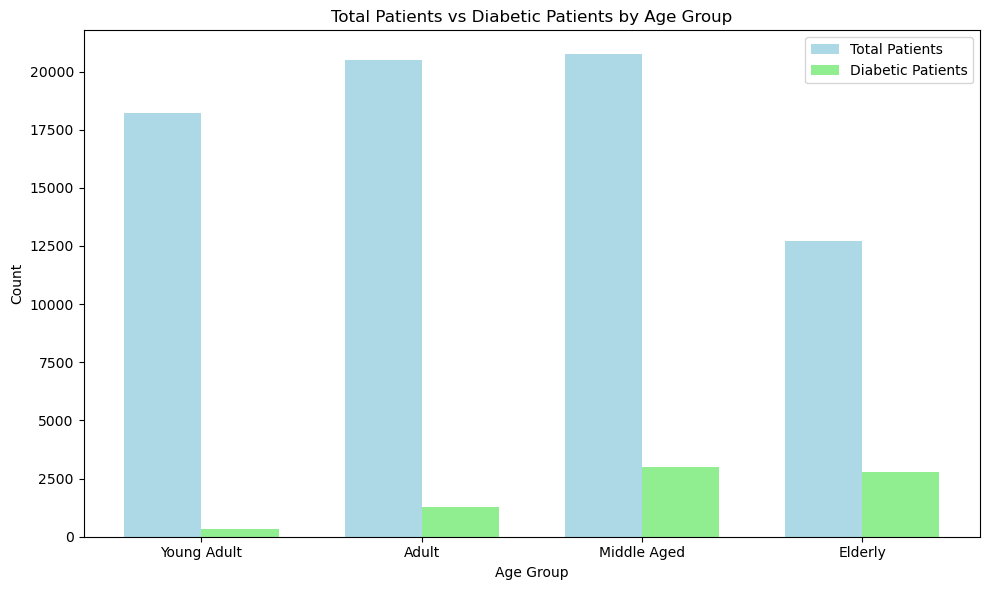

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Define the width of each bar
bar_width = 0.35

# Calculate the position for each group
index = np.arange(len(age_diabetes_df))

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for the total number of patients
bar1 = ax.bar(index, age_diabetes_df['total_patients'], bar_width, label='Total Patients', color='lightblue')

# Plot the bars for the percentage of diabetic patients
bar2 = ax.bar(index + bar_width, age_diabetes_df['diabetes'], bar_width, label='Diabetic Patients', color='lightgreen')

# Add labels, title, and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Total Patients vs Diabetic Patients by Age Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(age_diabetes_df['age_group'])
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [21]:
# two sample test 

The t test above is used to test our null hypothesis. Our null hypothesis states that BMI has no affect on Diabetes. Our alternative suggests that those patienst with a BMI over 32 will be disproportionately affected by diabetes compared to those with a BMI between 18 and 25 (considred healthy range). Our two sample t test using blood glucose levels as a proxy for diabetes, as we could not directly use diabetes status for it is not a continuous variable, shows that we must reject our Null and accept the alternative! Those with BMI's greater than 32 are disproportionately impacted by diabetes compared to those with a BMI between 18 and 25! 